# <center>Week 1 Assignment</center>
In this week's FTE, we examined CSV and JSON file formats. We wrote code to manually convert a specific CSV file to a specific JSON in the process. 

In [ ]:
# Read CSV file. This wouldn't work well for very large files
with open('data/scientists.csv') as f:
    reader = csv.DictReader(f)
    rows = list(reader)
    
# Write JSON file to disk
with open('data/scientists.json', 'w') as f:
    json.dump(rows, f)

## Part 1

The comment above the CSV section makes an assumption and says it wouldn't work for large files. Use the following articles to understand the terms **eager evaluation** and **lazy evaluation**:
* https://en.wikipedia.org/wiki/Eager_evaluation
* https://en.wikipedia.org/wiki/Lazy_evaluation

Now answer the following questions:

1. In light of the two definitions above, what is the assumption made by that comment?

An eager evaluation in computer programming is known as a strict evaluation. This type of expression is evaluated as soon as it is bounded to a variable. A lazy evaluation is also known as call-by-need. This expression is evaluated when it is needed. After reviewing the two definitions and examples of them the expressions used are eager evaluations. This is because there are no conditional statements that would need to be checked for this code to run. Instead it is running as soon as it is being compiled. The assumption made in the comment for the CSV section is that the eager evaluation might cause an issue to occur when trying to run this code for large files. 

2. Explain why that assumption is right or wrong.

After reviewing the functions used in the code below the comments, I believe that the assumption is wrong. The code uses eager evaluations to open and read a CSV file, put them in a reader variable called reader, and then use the reader variable to put them in list variable to store each of the rows data called rows. This rows variable could then be used to examine the data. There is nothing being used that could affect the file.

3. Is it safe to use the code above on large files?

Yes, I believe that this code would be safe to use on large files. This is because of the type of evaluation and functions being used. There are no conditional statements or functions that could cause an issue based on file size.

## Part 2

Programmers hate code written for a specific case, "I don't care if it can solve one special case, I want it to solve *all* cases." This generalization process is called **"abstraction"**.

1. Generalize the CSV->JSON code above into a function that can work for any CSV file and any JSON file (within reason).

Being able to convert in only one direction is only helpful half the time. Specious math aside, 

2. Write a generalized JSON->CSV converter function.

3. Use the functions to do a "round-trip" (CSV->JSON->CSV or JSON->CSV->JSON) on the Consumer Complaint Database data found at https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation

When you are done with the two functions, the original and the round-trip files should be reasonably identical.

**Hint:** Mac and Linux have a command line tool called 'diff' that will show differences between two files. Windows users can use the 'fc' command on the command line. See this answer on StackOverflow for alternatives: https://stackoverflow.com/questions/6877238/what-is-the-windows-equivalent-of-the-diff-command

**Also: No using libraries like Pandas that will automatically do the conversion!!** The purpose of this exercise is for you to get a fairly deep understanding of the two formats and using a converter will not fulfill that purpose. 

1. The function below allows for a user to put the path of any CSV file in the function to have it turned into a JSON.

In [124]:
import csv, json
def convert_CSV (path):
    #Read CSV file
    with open(path) as f:
        reader = csv.DictReader(f)
        rows = list(reader)
    # Write JSON path & file to disk
    json_path = path.replace("csv","json")
    with open(json_path, 'w') as f:
        json.dump(rows, f)

In [125]:
convert_CSV("C:/Users/eltac/Desktop/data/scientists.csv")

In [126]:
def printplus(obj):
    """
    Pretty-prints the object passed in.

    """
    # Dict
    if isinstance(obj, dict):
        for k, v in sorted(obj.items()):
            print (u'{0}: {1}'.format(k, v))

    # List or tuple            
    elif isinstance(obj, list) or isinstance(obj, tuple):
        for x in obj:
            print (x)

    # Other
    else:
        print (obj)

In [127]:
with open("C:/Users/eltac/Desktop/data/scientists.json") as f:
    data = json.load(f)
printplus(data)

{'Name': 'Rosaline Franklin', 'Born': '1920-07-25', 'Died': '1958-04-16', 'Age': '37', 'Occupation': 'Chemist'}
{'Name': 'William Gosset', 'Born': '1876-06-13', 'Died': '1937-10-16', 'Age': '61', 'Occupation': 'Statistician'}
{'Name': 'Florence Nightingale', 'Born': '1820-05-12', 'Died': '1910-08-13', 'Age': '90', 'Occupation': 'Nurse'}
{'Name': 'Marie Curie', 'Born': '1867-11-07', 'Died': '1934-07-04', 'Age': '66', 'Occupation': 'Chemist'}
{'Name': 'Rachel Carson', 'Born': '1907-05-27', 'Died': '1964-04-14', 'Age': '56', 'Occupation': 'Biologist'}
{'Name': 'John Snow', 'Born': '1813-03-15', 'Died': '1858-06-16', 'Age': '45', 'Occupation': 'Physician'}
{'Name': 'Alan Turing', 'Born': '1912-06-23', 'Died': '1954-06-07', 'Age': '41', 'Occupation': 'Computer Scientist'}
{'Name': 'Johann Gauss', 'Born': '1777-04-30', 'Died': '1855-02-23', 'Age': '77', 'Occupation': 'Mathematician'}


2. The function below allows for a user to put the path of any JSON file in the function to have it turned into a CSV.

In [128]:
import csv, json

def convert_json (path):
    # loads json file
    with open(path) as json_data:
        data = json.load(json_data)
        json_data.close()
        #creates csv file and loads json data into csv format
    csv_path = path.replace("json", "csv")
    with open(csv_path,"w") as csv_data:
        csv_file = csv.writer(csv_data)
        csv_file.writerow(data[0].keys())
        for row in data:
            csv_file.writerow(row.values()) 

In [129]:
convert_json("C:/Users/eltac/Desktop/data/scientists.json")

In [130]:
csv_text = []
with open("C:/Users/eltac/Desktop/data/scientists.csv", 'r') as infile:
    for line in infile:
        csv_text.append(line)
        
csv_text

['Name,Born,Died,Age,Occupation\n',
 '\n',
 'Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist\n',
 '\n',
 'William Gosset,1876-06-13,1937-10-16,61,Statistician\n',
 '\n',
 'Florence Nightingale,1820-05-12,1910-08-13,90,Nurse\n',
 '\n',
 'Marie Curie,1867-11-07,1934-07-04,66,Chemist\n',
 '\n',
 'Rachel Carson,1907-05-27,1964-04-14,56,Biologist\n',
 '\n',
 'John Snow,1813-03-15,1858-06-16,45,Physician\n',
 '\n',
 'Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist\n',
 '\n',
 'Johann Gauss,1777-04-30,1855-02-23,77,Mathematician\n',
 '\n']

3. This section is the round about portion with the consumer complaint database CSV

CSV -> JSON -> CSV

Downloaded two CSV files and rename one in order to keep an original version safe from being overwritten. 
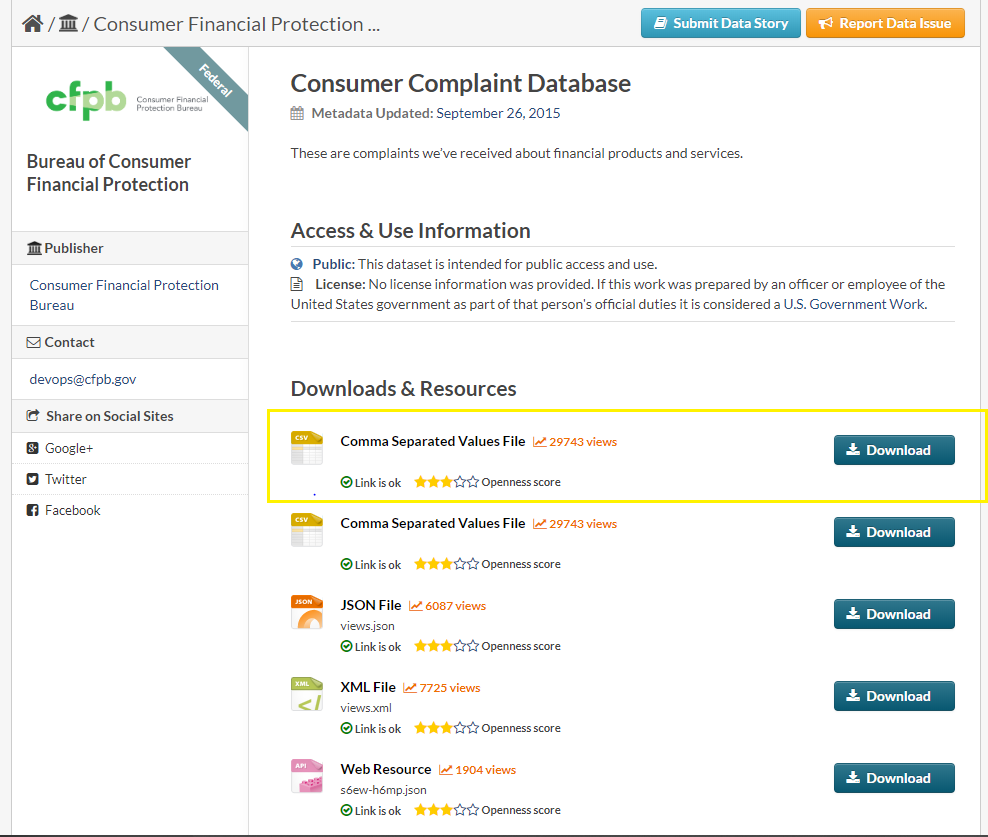

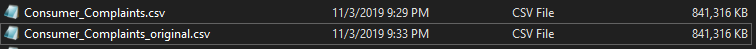

In [133]:
import csv, json

#function converts CSV to JSON
def convert_CSV (path):
    #Read CSV file
    with open(path) as f:
        reader = csv.DictReader(f)
        rows = list(reader)
    # Write JSON path & file to disk
    json_path = path.replace("csv","json")
    with open(json_path, 'w') as f:
        json.dump(rows, f)

#function converts CSV to JSON
def convert_json (path):
    # loads json file
    with open(path) as json_data:
        data = json.load(json_data)
        json_data.close()
        #creates csv file and loads json data into csv format
    csv_path = path.replace("json", "csv")
    with open(csv_path,"w") as csv_data:
        csv_file = csv.writer(csv_data)
        csv_file.writerow(data[0].keys())
        for row in data:
            csv_file.writerow(row.values())

In [134]:
import csv, json
convert_CSV("C:/Users/eltac/Desktop/data/Consumer_Complaints.csv")
convert_json("C:/Users/eltac/Desktop/data/Consumer_Complaints.json")

In [135]:
with open("C:/Users/eltac/Desktop/data/Consumer_Complaints.json") as f:
    data2 = json.load(f)
printplus(data2)

{'Sub-issue': 'Information is not mine', 'Product': 'Credit reporting', 'Consumer consent provided?': 'Consent not provided', 'Consumer complaint narrative': '', 'Tags': '', 'Date received': '08/09/2015', 'ZIP code': '08872', 'Company': 'Experian Information Solutions Inc.', 'Sub-product': '', 'Date sent to company': '08/09/2015', 'Consumer disputed?': 'No', 'State': 'NJ', 'Timely response?': 'Yes', 'Company response to consumer': 'Closed with non-monetary relief', 'Company public response': 'Company chooses not to provide a public response', 'Submitted via': 'Web', 'Issue': 'Incorrect information on credit report', 'Complaint ID': '1509954'}
{'Sub-issue': 'Was not notified of investigation status or results', 'Product': 'Credit reporting, credit repair services, or other personal consumer reports', 'Consumer consent provided?': 'Consent not provided', 'Consumer complaint narrative': '', 'Tags': '', 'Date received': '01/29/2019', 'ZIP code': '10801', 'Company': 'EQUIFAX, INC.', 'Sub-pr

In [139]:
csv_text2 = []
with open("C:/Users/eltac/Desktop/data/Consumer_Complaints.csv", 'r') as infile:
    for line in infile:
        csv_text2.append(line)
        
csv_text2

['Sub-issue,Product,Consumer consent provided?,Consumer complaint narrative,Tags,Date received,ZIP code,Company,Sub-product,Date sent to company,Consumer disputed?,State,Timely response?,Company response to consumer,Company public response,Submitted via,Issue,Complaint ID\n',
 '\n',
 'Information is not mine,Credit reporting,Consent not provided,,,08/09/2015,08872,Experian Information Solutions Inc.,,08/09/2015,No,NJ,Yes,Closed with non-monetary relief,Company chooses not to provide a public response,Web,Incorrect information on credit report,1509954\n',
 '\n',
 'Was not notified of investigation status or results,"Credit reporting, credit repair services, or other personal consumer reports",Consent not provided,,,01/29/2019,10801,"EQUIFAX, INC.",Credit reporting,01/30/2019,N/A,NY,Yes,Closed with non-monetary relief,,Web,Problem with a credit reporting company\'s investigation into an existing problem,3136759\n',
 '\n',
 ',Mortgage,Consent not provided,,,08/19/2015,94526,WELLS FARGO & 

Windows round about CSV vs Orignal


Round about file

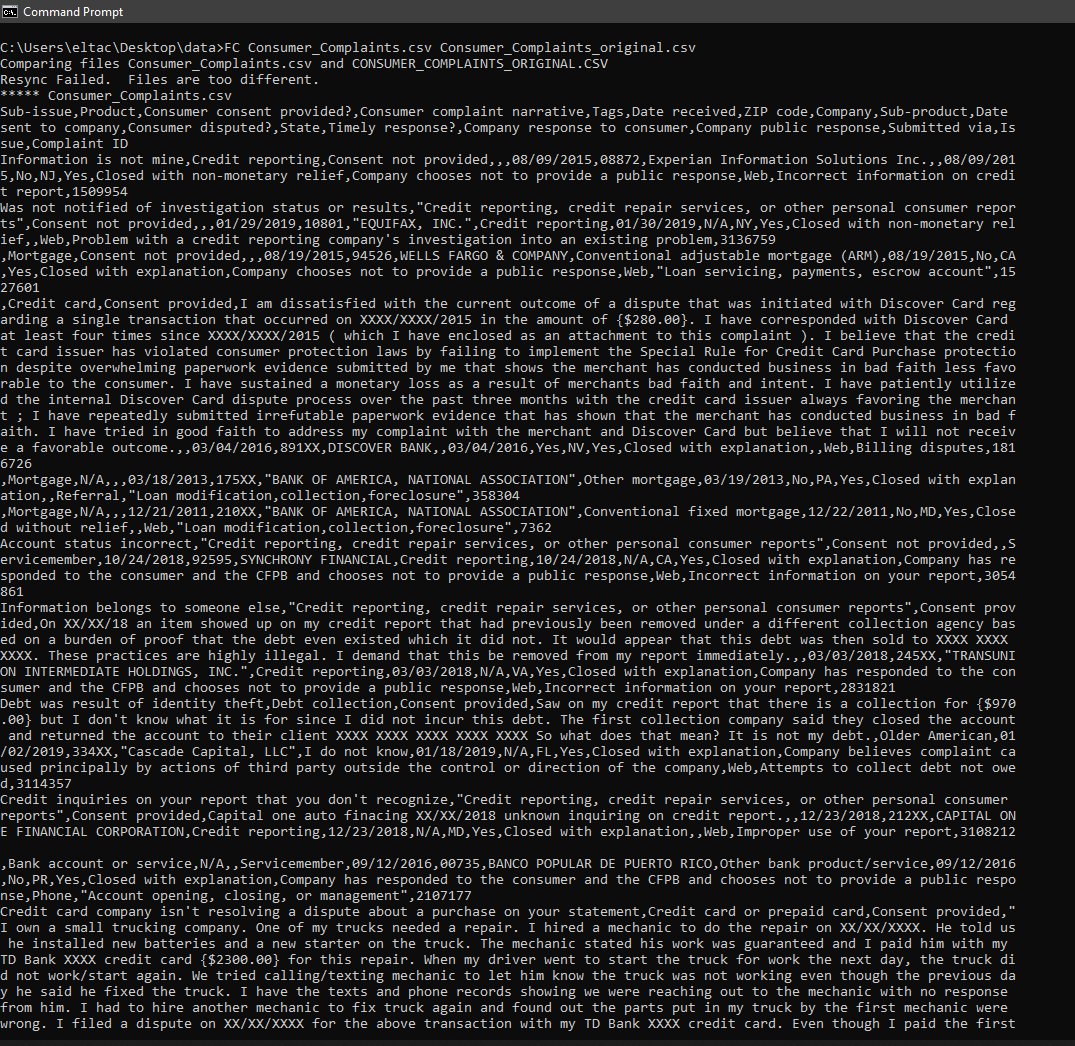


Original File
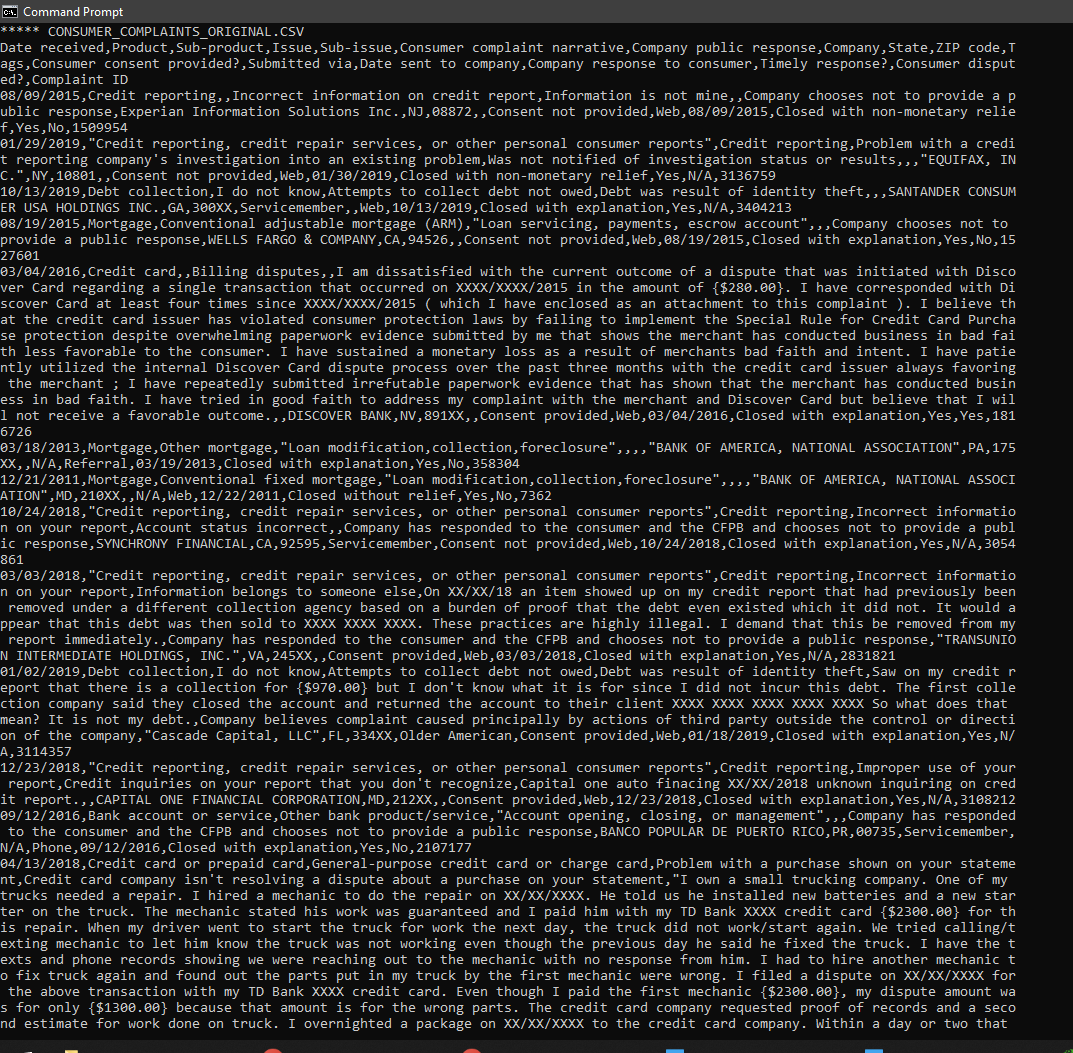